# The Python ecosystem - Plotting with Python

https://github.com/rougier/matplotlib-tutorial

http://pythonplot.com/

https://dsaber.com/2016/10/02/a-dramatic-tour-through-pythons-data-visualization-landscape-including-ggplot-and-altair/

http://pbpython.com/effective-matplotlib.html

__Plotting is an essential component of data analysis__. It helps you to understand complex data sets and help others understand them too. However, the python visualization world can be a frustrating place. There are many different options and choosing the right one is a challenge. 

## The Python Visualization Landscape

<img src="_img/landscape.png", width=700>


Source: [Nicolas P. Rougier](https://github.com/rougier/python-visualization-landscape): An adaptation the Python Visualization Landscape slide from Jake VanderPlas' keynote at Pycon 2017 ([slides](https://speakerdeck.com/jakevdp/pythons-visualization-landscape-pycon-2017), [video](https://www.youtube.com/watch?v=FytuB8nFHPQ)). 


Online you find many post and reports which comare and assess different Python libraires (e.g. blog post by [Dan Saber](https://dsaber.com/2016/10/02/a-dramatic-tour-through-pythons-data-visualization-landscape-including-ggplot-and-altair/)). These ressourcsea are very valuable sources of inforatnion if you are not yet sure which libarary fits best your needs. 

In this section we indroduce three plotting libraries.


### matplotlib

[matplotlib](https://matplotlib.org/)  is probably the most well known 2D plotting Python library. It allows to produce publication quality figures in a variety of hardcopy formats and interactive environments across platforms. However, matplotlib is the cause of frustration due to the complex syntax. 


### Seaborn

[Seaborn](http://seaborn.pydata.org/index.html) is a library for making attractive and informative statistical graphics in Python. It is built on top of [matplotlib](https://matplotlib.org/) and it supports [numpy](http://www.numpy.org/) and [pandas](http://pandas.pydata.org/) data structures and statistical routines from [scipy](https://scipy.org/) and [statsmodels](http://www.statsmodels.org/stable/index.html).

_If matplotlib tries to make easy things easy and hard things possible, seaborn tries to make a well-defined set of hard things easy too_ ([Quote by Michael Waskom](http://seaborn.pydata.org/introduction.html)).



### HoloViews

[HoloViews](http://holoviews.org/) one out of several interactive plotting libraries. It is an open-source Python library designed to make data analysis and visualization seamless and simple. 


***
## Matplotlib

matplotlib is probably the single most used Python package for 2D-graphics. It provides both a very quick way to visualize data from Python and publication-quality figures in many formats. 

matplotlib's `pyplot` module provides a convenient interface to the matplotlib object-oriented plotting library. It is modeled closely after [MATLAB](https://de.wikipedia.org/wiki/Matlab). 

Hence, we import the matplotlib libarary and matplotlib's `pyplot` module using the cannonical commands

    import matplotlib as mpl
    import matplotlib.pyplot as plt

Further, when working with Jupyter notebooks we call the magic funtion

    % matplotlib inline

to make sure the figures are creatd within then notebook (actually the figures are shown directely in the cell output).

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt

% matplotlib inline

It is worth noting that __matplotlib has two interfaces__. The first is based on MATLAB and uses a __state-based interface__. The second option is an an __object-oriented interface__. Hence, multiple solutions to problems that look somewhat similar but are not the same, which for sure causes confusion for new users if the looking for solutions to their tasks via [stack overflow](https://stackoverflow.com/) or google search. _(Note that in this section we use the object oriented interface.)_

Another source of confsuion ist that matplotlib is well integrated into other Python libaries, such as [pandas](http://pandas.pydata.org/), [seaborn](http://seaborn.pydata.org/index.html), [xarray](http://xarray.pydata.org/en/stable/), among others. Hence, there is confusion as to when one should use pure matplotlib to plot something with a tool that is built on top of matplotlib. 

> **Be aware that anytime there is more than one way to build a visualization. Therefore it is challenging for the new or infrequent user to follow the right path.** 

***

## Seaborn

[Seaborn](https://seaborn.pydata.org/) is a Python visualization library based on matplotlib. It provides a high-level interface for drawing **attractive statistical graphics**.

In [2]:
import seaborn as sns

# Use seaborn graphic settings
sns.set()

# Load the example Iris flower dataset
iris = sns.load_dataset("iris")

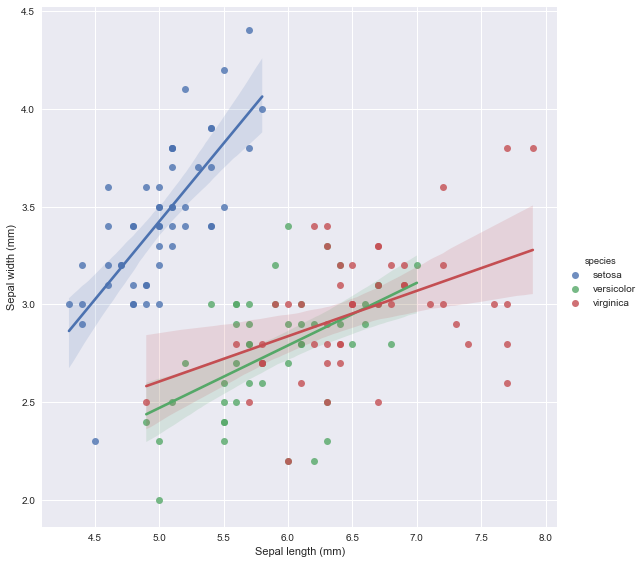

In [3]:
# Plot tip as a function of toal bill across days
g = sns.lmplot(x="sepal_length", y="sepal_width", hue="species",
               truncate=True, size=8, data=iris)

# Use more informative axis labels than are provided by default
g.set_axis_labels("Sepal length (mm)", "Sepal width (mm)");

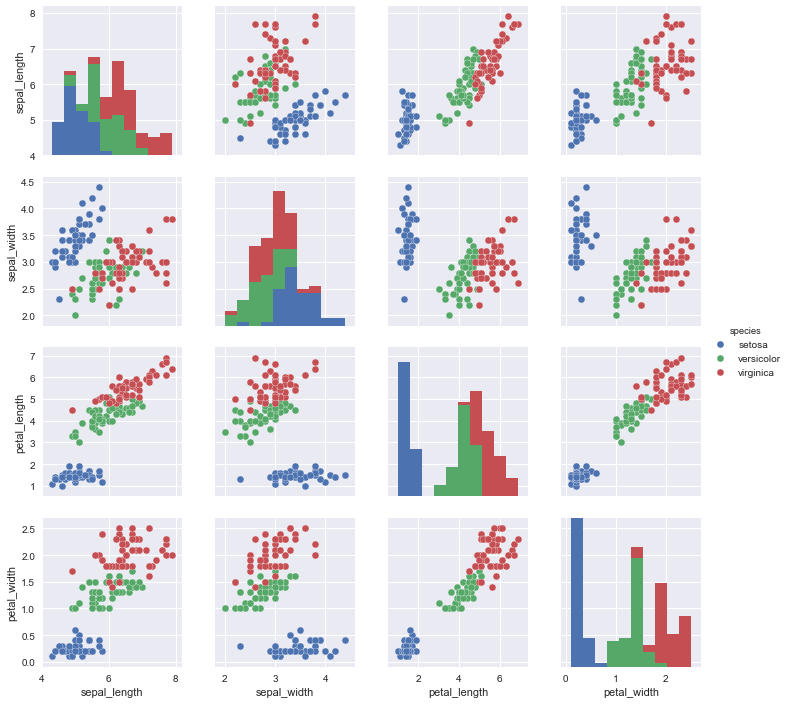

In [4]:
sns.pairplot(iris, hue="species");

***

## Holoviews

[HoloViews](http://holoviews.org/) is an open-source Python library designed to make data analysis and visualization seamless and simple. With HoloViews, you can usually express what you want to do in very few lines of code, letting you focus on what you are trying to explore and convey, not on the process of plotting.

**A Reproduction of Gapminder**

In [Hans Rosling's](https://de.wikipedia.org/wiki/Hans_Rosling) iconic [TED Talk](https://www.ted.com/talks/hans_rosling_shows_the_best_stats_you_ve_ever_seen) he shows us that many advances have been made since the 60s, when our notions of development were established. The engaging infographic illustrates how our ongoing perceptions of a "first world" and a "third world" are wrong, and that the world has become a spectrum of developing countries.

Gapminder demo demonstrating how to combine to extend a HoloViews plot with custom bokeh widgets to deploy an app  ([Source code](http://holoviews.org/gallery/apps/bokeh/gapminder.html#bokeh-gallery-gapminder))

In [5]:
import pandas as pd
import numpy as np
import holoviews as hv

from bokeh.io import curdoc, output_notebook, show
from bokeh.application.handlers import FunctionHandler
from bokeh.application import Application
from bokeh.layouts import layout
from bokeh.models import Slider, Button
from holoviews.plotting.bokeh import BokehRenderer

# Activate bokeh 
output_notebook()

Loading BokehJS ...

In [6]:
# Load data set 
gapminder_df = pd.read_csv("../datasets/gapminder.csv")
# Declare data set
ds = hv.Dataset(gapminder_df)

def gapminder_plot(doc):    
    # Apply dimension labels and ranges
    kdims = ['Fertility', 'Life expectancy']
    vdims = ['Country', 'Population', 'Group']
    dimensions = {
        'Fertility' : dict(label='Children per woman (total fertility)', range=(0, 10)),
        'Life expectancy': dict(label='Life expectancy at birth (years)', range=(15, 100)),
        'Population': ('population', 'Population')
    }
    
    # Create Points plotting fertility vs life expectancy indexed by Year
    gapminder_ds = ds.redim(**dimensions).to(hv.Points, kdims, vdims, 'Year')

    # Define annotations
    text = gapminder_ds.clone({yr: hv.Text(1.2, 25, str(int(yr)), fontsize=30)
                               for yr in gapminder_ds.keys()})

    # Define options
    opts = {'plot': dict(width=950, height=450,tools=['hover'], size_index='Population',
                         color_index='Group', size_fn=np.sqrt, title_format="{label}"),
           'style': dict(cmap='Set1', size=0.3, line_color='black', alpha=0.6)}
    text_opts = {'style': dict(text_font_size='52pt', text_color='lightgray')}

    # Combine Points and Text
    hvgapminder = (gapminder_ds({'Points': opts}) * text({'Text': text_opts})).relabel('Gapminder Demo')

    # Define custom widgets
    def animate_update():
        year = slider.value + 1
        if year > end:
            year = start
        slider.value = year

    # Update the holoviews plot by calling update with the new year.
    def slider_update(attrname, old, new):
        hvplot.update((new,))

    def animate():
        if button.label == '► Play':
            button.label = '❚❚ Pause'
            doc.add_periodic_callback(animate_update, 200)
        else:
            button.label = '► Play'
            doc.remove_periodic_callback(animate_update)

    start, end = ds.range('Year')
    slider = Slider(start=start, end=end, value=start, step=1, title="Year")
    slider.on_change('value', slider_update)

    button = Button(label='► Play', width=60)
    button.on_click(animate)
    
    # Get HoloViews plot
    hvplot = BokehRenderer.get_plot(hvgapminder, doc)
    # Make a bokeh layout and add it as the Document root
    plot = layout([[hvplot.state], [slider, button]], sizing_mode='fixed')
    doc.add_root(plot)
    return doc

In [7]:
# To display in the notebook
handler = FunctionHandler(gapminder_plot)
app = Application(handler)
show(app)

INFO:bokeh.server.server:Starting Bokeh server version 0.12.13 (running on Tornado 4.5.3)


INFO:tornado.access:200 GET /autoload.js?bokeh-autoload-element=066c2584-bbf5-4cfc-b271-93879e08445f&bokeh-absolute-url=http://localhost:50721 (::1) 951.60ms
INFO:tornado.access:200 GET /static/js/bokeh-widgets.min.js?v=4fab6c0812b586bd3b599927148ddee2 (::1) 0.00ms
INFO:tornado.access:200 GET /static/js/bokeh-tables.min.js?v=c7b9e0042fcdcc9186ff88b239811602 (::1) 0.00ms
INFO:tornado.access:200 GET /static/js/bokeh-gl.min.js?v=2f4a9a9e9f8b300c68c4ed24b5f4979a (::1) 0.00ms
INFO:tornado.access:200 GET /static/js/bokeh.min.js?v=15c391efcd2d880600216acd13aa97ff (::1) 1154.40ms
INFO:tornado.access:200 GET /static/css/bokeh.min.css?v=06206b4cbc8ea56b6016931bd1976f7f (::1) 0.00ms
INFO:tornado.access:200 GET /static/css/bokeh-widgets.min.css?v=509e292d9a7ef7e9eb8382fcde7b4a6e (::1) 0.00ms
INFO:tornado.access:200 GET /static/css/bokeh-tables.min.css?v=aa783ffa4e290813a295a99cce2f8b5d (::1) 0.00ms
INFO:tornado.access:101 GET /ws?bokeh-protocol-version=1.0&bokeh-session-id=JOttdjU8GgtTZFmTHkysP4TX